集群中心的座標 [[2.1 2.1]
 [1.1 1.1]]
預測: [1 1 1 0 0 0]
預測[1,1],[2.3,2.1] [1 0]


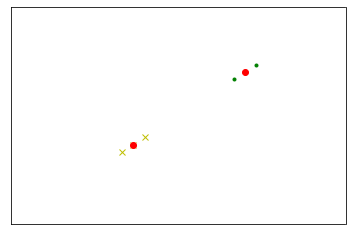

In [3]:
import numpy as np

from sklearn.model_selection import train_test_split #匯入 K-means 函式庫
from sklearn.cluster import KMeans
from time import time 
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics

X=np.array([[1,1],[1.1,1.1],[1.2,1.2],[2,2],[2.1,2.1],[2.2,2.2]])
y=[1,1,1,0,0,0]
kmeans =KMeans(n_clusters=2,random_state=0).fit(X) #KMeans 演算法 指定2類資料
print("集群中心的座標",kmeans.cluster_centers_) #取得集群中心的座標
print("預測:",kmeans.predict(X)) #預測
print("預測[1,1],[2.3,2.1]",kmeans.predict([[1,1],[2.3,2.1]])) #預測資料

plt.axis([0,3,0,3]) #用圖片顯示
plt.plot(X[:3,0],X[:3,1],'yx') #黃色點
plt.plot(X[3:,0],X[3:,1],'g.') #綠色點
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'ro') #顯示中心點
plt.xticks(())
plt.yticks(())
plt.show()

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics

iris=datasets.load_iris()

iris_X_train,iris_X_test,iris_y_train,iris_y_test = train_test_split(iris.data,iris.target,test_size=0.2)

kmeans=KMeans(n_clusters=2)
kmeans_fit=kmeans.fit(iris_X_train)

print("實際",iris_y_train)
print("預測",kmeans_fit.labels_)

iris_y_train[iris_y_train==1]=11
iris_y_train[iris_y_train==0]=1
iris_y_train[iris_y_train==11]=0
print("調整",iris_y_train)

score=metrics.accuracy_score(iris_y_train,kmeans.predict(iris_X_train))
print("準確度:{0:f}".format(score))

實際 [0 2 2 0 2 0 2 2 2 1 1 1 2 1 2 1 0 0 1 0 0 2 2 2 0 1 0 2 2 2 0 1 1 2 2 0 0
 0 2 0 1 0 1 2 2 1 0 1 2 2 0 1 2 2 0 0 1 2 1 1 2 1 0 2 0 1 2 2 2 0 0 2 1 0
 0 1 0 2 0 1 1 2 1 1 2 1 2 2 0 2 2 1 0 2 1 1 1 1 2 1 0 0 1 0 1 0 0 1 1 2 0
 2 2 2 1 1 2 2 1 1]
預測 [0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0
 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0
 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0
 1 1 1 1 1 1 1 1 1]
調整 [1 2 2 1 2 1 2 2 2 0 0 0 2 0 2 0 1 1 0 1 1 2 2 2 1 0 1 2 2 2 1 0 0 2 2 1 1
 1 2 1 0 1 0 2 2 0 1 0 2 2 1 0 2 2 1 1 0 2 0 0 2 0 1 2 1 0 2 2 2 1 1 2 0 1
 1 0 1 2 1 0 0 2 0 0 2 0 2 2 1 2 2 0 1 2 0 0 0 0 2 0 1 1 0 1 0 1 1 0 0 2 1
 2 2 2 0 0 2 2 0 0]
準確度:0.016667


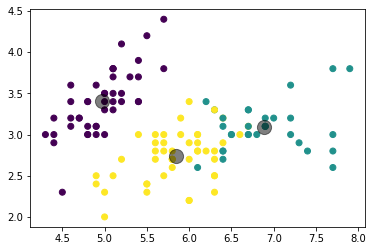

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics

iris=datasets.load_iris()

iris_X_train,iris_X_test,iris_y_train,iris_y_test = train_test_split(iris.data,iris.target,test_size=0.2)

kmeans=KMeans(n_clusters=3)
kmeans.fit(iris_X_train)
y_predict=kmeans.predict(iris_X_train)

x1=iris_X_train[:,0]
y1=iris_X_train[:,1]
plt.scatter(x1,y1,c=y_predict,cmap="viridis")

centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)
plt.show()

In [11]:
# -*- coding: utf-8 -*-
from sklearn import datasets
from sklearn import svm
import numpy as np

if __name__ == '__main__':

    iris = datasets.load_iris() 
    print(type(iris), dir(iris))

    x = iris.get('data')
    y = iris.get('target')

    # 隨機劃分訓練集和測試集
    num = x.shape[0] # 樣本總數
    ratio = 7/3 # 劃分比例，訓練集數目:測試集數目
    num_test = int(num/(1+ratio)) # 測試集樣本數目
    num_train = num -  num_test # 訓練集樣本數目
    index = np.arange(num) # 產生樣本標號
    np.random.shuffle(index) # 洗牌
    x_test = x[index[:num_test],:] # 取出洗牌後前 num_test 作為測試集
    y_test = y[index[:num_test]]
    x_train = x[index[num_test:],:] # 剩餘作為訓練集
    y_train = y[index[num_test:]]

    clf_linear = svm.SVC(decision_function_shape="ovo", kernel="linear")
    clf_rbf = svm.SVC(decision_function_shape="ovo", kernel="rbf")
    clf_linear.fit(x_train, y_train)
    clf_rbf.fit(x_train, y_train)

    y_test_pre_linear = clf_linear.predict(x_test)
    y_test_pre_rbf = clf_rbf.predict(x_test)

    
    # 計算分類準確率
    acc_linear = sum(y_test_pre_linear==y_test)/num_test
    print('linear kernel: The accuracy is', acc_linear) 
    acc_rbf = sum(y_test_pre_rbf==y_test)/num_test
    print('rbf kernel: The accuracy is', acc_rbf) 


<class 'sklearn.utils.Bunch'> ['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
linear kernel: The accuracy is 0.9333333333333333
rbf kernel: The accuracy is 0.9333333333333333


原架構使用 kmeans 
準確度不固定，上一次訓練準確度為:0.016667

改良架構使用SVM
準確度穩定，上一次訓練準確定保持在:0.9333333333333333 

預估兩者差異為SVM可以處理高維度的非線性的分群，而KMeans對於分群則不能良好處理非線性問題。